# Logistic Regression

## Importing the libraries

In [4]:
# Importing the required libraries
import numpy as np  # Imports the NumPy library, which is used for numerical computations and handling arrays.
import matplotlib.pyplot as plt  # Imports the pyplot module from Matplotlib for data visualization (e.g., plotting graphs).
import pandas as pd  # Imports the Pandas library, which is used for data manipulation and analysis.

## Importing the dataset

In [3]:
# Loading the dataset and extracting features and target variable
dataset = pd.read_csv('/content/Social_Network_Ads.csv')  # Loads the dataset from a CSV file located at the specified path.
X = dataset.iloc[:, [2, 3]].values  # Extracts the features (columns 2 and 3) from the dataset and stores them in the variable X.
y = dataset.iloc[:, -1].values  # Extracts the target variable (the last column) from the dataset and stores it in the variable y.

## Splitting the dataset into the Training set and Test set

In [5]:
from sklearn.model_selection import train_test_split  # Imports the train_test_split function from scikit-learn to split the data into training and test sets.

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# Splits the feature set X and target variable y into training and test sets with 75% for training and 25% for testing.
# The random_state ensures reproducibility of the split.

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler  # Imports StandardScaler from scikit-learn to scale features.

sc = StandardScaler()  # Creates an instance of the StandardScaler class to standardize features.

# Scaling the training and test sets
X_train = sc.fit_transform(X_train)  # Fits the scaler to the training data and transforms it by standardizing the features.
X_test = sc.transform(X_test)  # Transforms the test data based on the training data's scaling parameters.

## Training the Logistic Regression model on the Training set

In [7]:
from sklearn.linear_model import LogisticRegression  # Imports the LogisticRegression class from scikit-learn.

classifier = LogisticRegression(random_state = 0)  # Creates an instance of the LogisticRegression class with a fixed random state for reproducibility.

# Fitting the Logistic Regression model to the training set
classifier.fit(X_train, y_train)  # Trains the logistic regression model using the scaled training data (X_train) and the target variable (y_train).

LogisticRegression(random_state=0)

## Predicting the Test set results

In [8]:
y_pred = classifier.predict(X_test)  # Predicts the target variable for the test set using the trained classifier.

## Making the Confusion Matrix

In [9]:
from sklearn.metrics import confusion_matrix  # Imports the confusion_matrix function from scikit-learn to evaluate classification results.

cm = confusion_matrix(y_test, y_pred)  # Computes the confusion matrix for the predicted values (y_pred) and actual values (y_test).
print(cm)  # Prints the confusion matrix to the console.

[[65  3]
 [ 8 24]]


## Visualising the Training set results

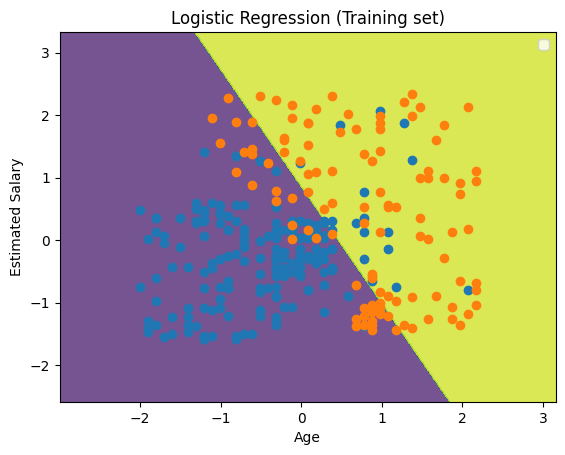

In [10]:
from matplotlib.colors import ListedColormap  # Imports ListedColormap from matplotlib to create custom color maps for plotting.

# Assigns the training data to X_set and y_set variables for easier manipulation in the plot.
X_set, y_set = X_train, y_train

# Creates a meshgrid for plotting decision boundaries by defining a grid of points over the feature space (X1, X2).
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

# Plots the contour plot by predicting the class for each point in the grid and reshaping the result to match the grid.
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)  # The alpha parameter controls transparency for the filled contours.
plt.xlim(X1.min(), X1.max())  # Sets the limits of the x-axis based on the meshgrid range.
plt.ylim(X2.min(), X2.max())  # Sets the limits of the y-axis based on the meshgrid range.

# Plots the training points on the graph, with each class represented by a different color.
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1])

plt.title('Logistic Regression (Training set)')  # Adds a title to the plot.
plt.xlabel('Age')  # Labels the x-axis as 'Age'.
plt.ylabel('Estimated Salary')  # Labels the y-axis as 'Estimated Salary'.
plt.legend()  # Adds a legend to the plot to identify the classes.
plt.show()  # Displays the plot.

## Visualising the Test set results

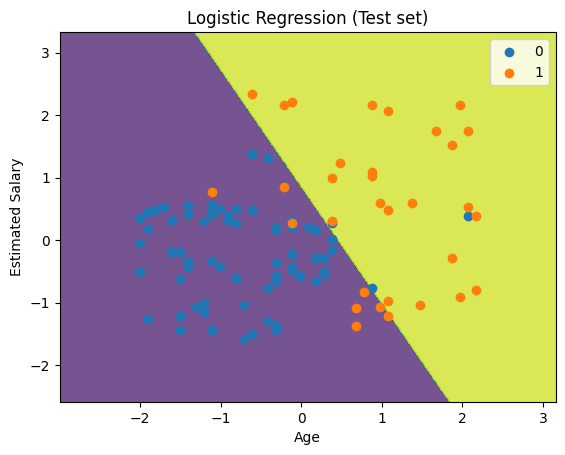

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                 label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()